In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

## Upload Dataset

In [2]:
data=pd.read_csv('Admission_Predict.csv')
data.sample(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
157,158,309,104,2,2.0,2.5,8.26,0,0.65
186,187,317,107,3,3.5,3.0,8.68,1,0.84
197,198,310,106,2,3.5,2.5,8.33,0,0.73
378,379,303,98,1,2.0,2.5,7.65,0,0.56
397,398,330,116,4,5.0,4.5,9.45,1,0.91


## Data Analysis

In [3]:
data.shape

(400, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
print('Is there any Null values\n',data.isnull().any())


Is there any Null values
 Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool


In [6]:
print('Is there any duplicate value',data.duplicated().any())

Is there any duplicate value False


In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


### Now Remove the Unnecessary column which is less realtion with admission prediciton

In [9]:
data=data.drop(['Serial No.','University Rating','SOP','LOR ','Research'],axis=1)
data.sample(5)

,GRE Score,TOEFL Score,CGPA,Chance of Admit
145,320,113,8.64,0.81
391,318,106,8.65,0.71
34,331,112,9.80,0.94
19,303,102,8.50,0.62
195,307,107,8.52,0.78


### Now Analysis the Data thorugh Visulization

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

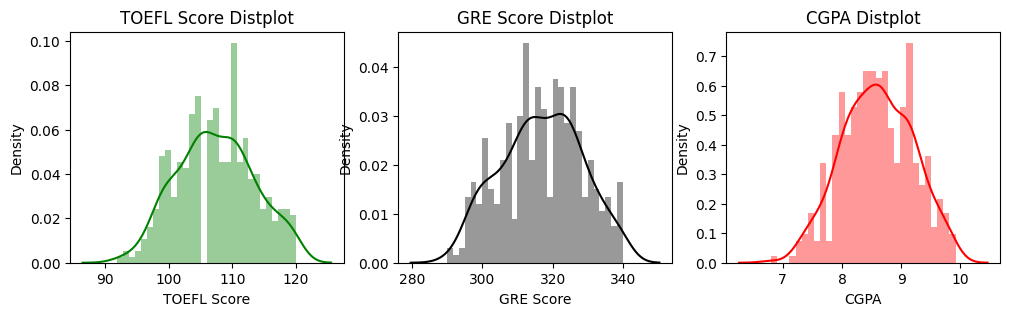

In [10]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3, figsize=(12,3))

ax1.set_title('TOEFL Score Distplot')
sns.distplot(data['TOEFL Score'],color='g',bins=30, ax=ax1)

ax2.set_title('GRE Score Distplot')
sns.distplot(data['GRE Score'],color='k',bins=30, ax=ax2)

ax3.set_title('CGPA Distplot')
sns.distplot(data['CGPA'],color='r',bins=30, ax=ax3)

plt.show()

In [11]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '], dtype='object')

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


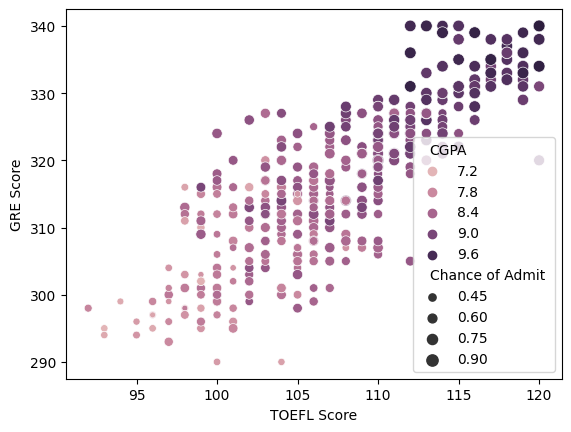

In [12]:
sns.scatterplot(data['TOEFL Score'],data['GRE Score'],hue=data['CGPA'],size=data['Chance of Admit '])
plt.show()

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


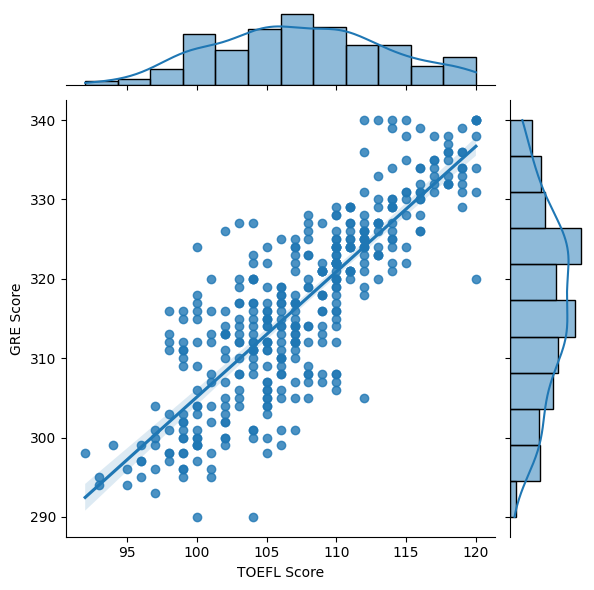

In [13]:
sns.jointplot(data['TOEFL Score'],data['GRE Score'],kind="reg")
plt.show()

### Now Scaling the column for good distribution

In [14]:
X=data.drop('Chance of Admit ',axis=1)
y=data['Chance of Admit ']
print('X shape',X.shape)
print('Y shape',y.shape)

X shape (400, 3)
Y shape (400,)


In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=0)
print('x_train shape',x_train.shape)
print('x_test shape',x_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

x_train shape (300, 3)
x_test shape (100, 3)
y_train shape (300,)
y_test shape (100,)


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

sc.fit(x_train)

x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [18]:
x_tarin_sc=pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc=pd.DataFrame(x_test_sc, columns=x_test.columns)

## Effect of Scaling

In [19]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '], dtype='object')

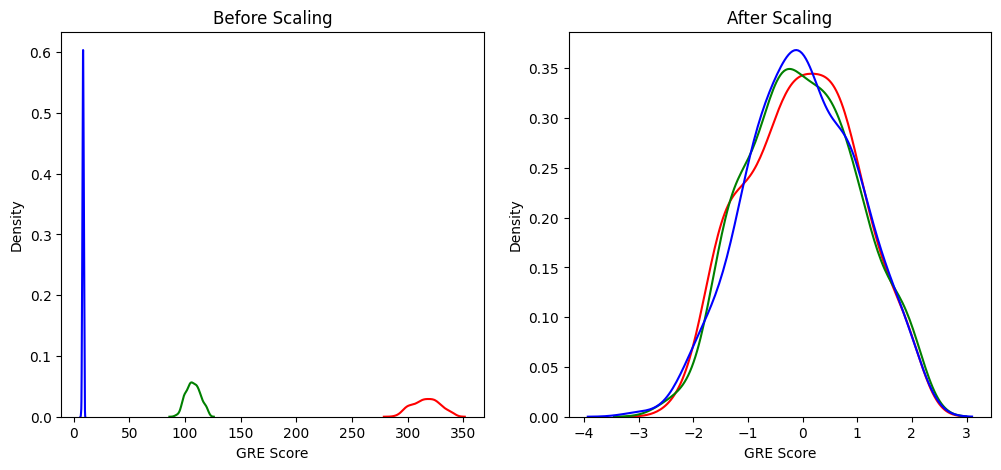

In [20]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['GRE Score'],color='r', ax=ax1,label='GRE Score')
sns.kdeplot(x_train['TOEFL Score'],color='g', ax=ax1,label='TOEFL Score')
sns.kdeplot(x_train['CGPA'],color='b', ax=ax1,label='CGPA')

ax2.set_title('After Scaling')
sns.kdeplot(x_tarin_sc['GRE Score'],color='r', ax=ax2,label='GRE Score')
sns.kdeplot(x_tarin_sc['TOEFL Score'],color='g', ax=ax2,label='TOEFL Score')
sns.kdeplot(x_tarin_sc['CGPA'],color='b', ax=ax2,label='CGPA')


plt.show()

## Now Use the LinearRegression to Predict the data

In [21]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=reg.predict(x_test)
y_pred

array([0.69474045, 0.71092088, 0.77647204, 0.6416983 , 0.73683965,
       0.61157165, 0.73141914, 0.62667825, 0.90221881, 0.90673411,
       0.55718611, 0.87987492, 0.73202231, 0.46223588, 0.83832118,
       0.65676432, 0.62579916, 0.84338196, 0.59038814, 0.7287756 ,
       0.86704311, 0.84467038, 0.66515389, 0.45282571, 0.78224691,
       0.58414987, 0.48345725, 0.66603835, 0.88511241, 0.66079184,
       0.6116005 , 0.72992424, 0.72034007, 0.56879083, 0.80376941,
       0.77749628, 0.61903163, 0.84944985, 0.63813781, 0.94825899,
       0.71378439, 0.66633138, 0.67636547, 0.78150396, 0.84134794,
       0.65027808, 0.56815427, 0.67320893, 0.62566575, 0.59558869,
       0.68449987, 0.80993286, 0.66383299, 0.85962009, 0.70423808,
       0.78054916, 0.69228983, 0.70889762, 0.77108939, 0.81977312,
       0.760948  , 0.49432174, 0.64725496, 0.51313399, 0.80355482,
       0.84280763, 0.75172266, 0.8872195 , 0.79158765, 0.745011  ,
       0.58094011, 0.83084046, 0.82671738, 0.60477526, 0.92880

In [23]:
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [24]:
print("Mean Absolute Error (MAE)",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error (MSE)",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

Mean Absolute Error (MAE) 0.051208819151334434
Mean Squared Error (MSE) 0.00534224055672526
R2 score 0.6938773904809863


## Comparing Actual value Vs Predict Value

In [25]:
## y_test or y_pred convert into dataset
comparing=pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
comparing.sample(10)

,Actual,Prediction
318,0.79,0.780549
146,0.75,0.696046
309,0.70,0.710921
348,0.57,0.462236
304,0.62,0.686255
8,0.50,0.585174
6,0.75,0.676365
59,0.42,0.656764
303,0.73,0.729924
78,0.44,0.483457


In [26]:
## here we can see the accuracy of the prediciton 
comparing.describe().round(1)

,Actual,Prediction
count,100.0,100.0
mean,0.7,0.7
std,0.1,0.1
min,0.4,0.5
25%,0.6,0.6
50%,0.7,0.7
75%,0.8,0.8
max,1.0,1.0


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


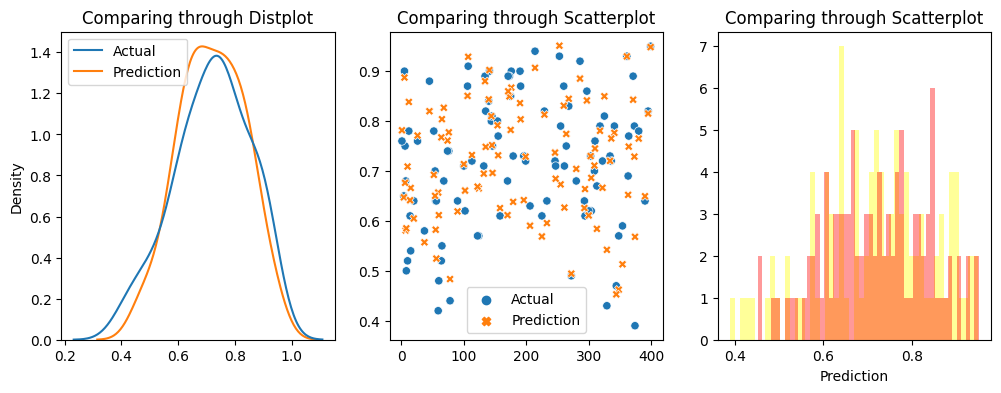

In [27]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,4))

ax1.set_title("Comparing through Distplot")
sns.kdeplot(data=comparing,ax=ax1)

ax2.set_title("Comparing through Scatterplot")
sns.scatterplot(data=comparing,ax=ax2)

ax3.set_title("Comparing through Scatterplot")
sns.distplot(comparing['Actual'], color='yellow',kde=False,bins=50,ax=ax3)
sns.distplot(comparing['Prediction'],color='red',kde=False,bins=50,ax=ax3)
plt.show()

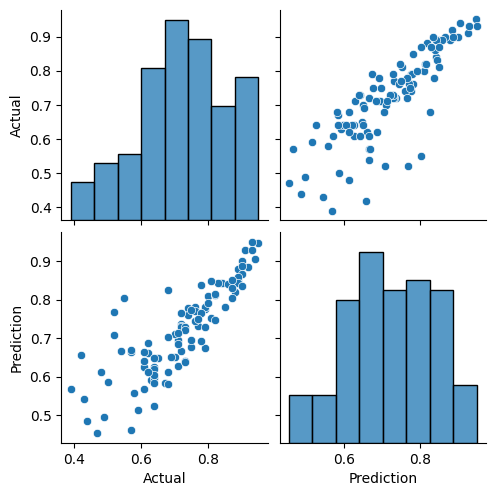

In [28]:
sns.pairplot(data=comparing)
plt.show()